In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from warnings import filterwarnings
filterwarnings("ignore")
init_notebook_mode(connected=True)            

In [38]:
import sys
import csv
csv.field_size_limit(sys.maxsize)

9223372036854775807

In [39]:
data = pd.read_csv("data/data.csv",encoding = "utf-8", engine = "python")
display(data.head())
display(data.info())

,summary,article
0,ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रि...,ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रि...
1,श्रद्धांजलि सभा के दौरान अचानक खराब हुई हिलेरी...,अमेरिका में राष्ट्रपति पद के लिए डेमोक्रेटिक प...
2,पूर्व भारतीय कप्तान अनिल कुंबले का मानना है कि...,पूर्व भारतीय क्रिकेट कप्तान अनिल कुंबले का मान...
3,इंडिगो के ग्राउंड स्टाफ ने यात्री से की हाथापा...,इंडिगो एयरलाइन के प्रेसीडेंट और डायरेक्टर आदित...
4,मीजान जाफरी ने किया खुलासा\r\nनव्या नंदा को बत...,संजय लीला भंसाली की फिल्म 'मलाल' से बॉलीवुड मे...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86298 entries, 0 to 86297
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  86298 non-null  object
 1   article  86298 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


None

In [40]:
summary_lengths = data.summary.map(lambda x: len(x.split(" ")))
article_lengths = data.article.map(lambda x: len(x.split(" ")))

<AxesSubplot:xlabel='summary'>

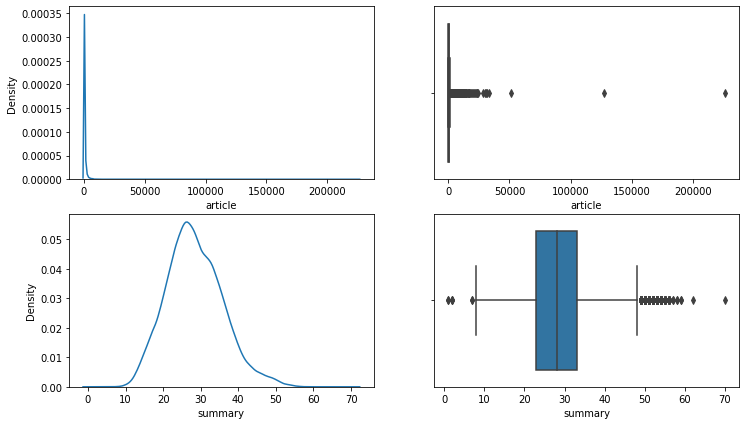

In [41]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.kdeplot(article_lengths)
plt.subplot(2,2,2)
sns.boxplot(article_lengths)
plt.subplot(2,2,3)
sns.kdeplot(summary_lengths)
plt.subplot(2,2,4)
sns.boxplot(summary_lengths)

In [42]:
for i in range(10,101,10):
    print(i , "percentile of article",np.percentile(article_lengths,i))

10 percentile of article 46.0
20 percentile of article 108.0
30 percentile of article 167.0
40 percentile of article 229.0
50 percentile of article 297.0
60 percentile of article 374.0
70 percentile of article 496.0
80 percentile of article 698.0
90 percentile of article 1127.0
100 percentile of article 226035.0


In [43]:
for i in range(90,101):
    print(i , "percentile of article",np.percentile(article_lengths,i))

90 percentile of article 1127.0
91 percentile of article 1201.0
92 percentile of article 1294.0
93 percentile of article 1397.0
94 percentile of article 1529.0
95 percentile of article 1708.0
96 percentile of article 1934.0
97 percentile of article 2267.0
98 percentile of article 2827.2399999999907
99 percentile of article 4035.209999999992
100 percentile of article 226035.0


In [21]:
for i in np.arange(99,100,.1):
    print(i , "percentile of article",np.percentile(article_lengths,i))

99.0 percentile of article 4035.209999999992
99.1 percentile of article 4280.981000000014
99.19999999999999 percentile of article 4524.119999999981
99.29999999999998 percentile of article 4802.762999999963
99.39999999999998 percentile of article 5102.217999999979
99.49999999999997 percentile of article 5525.239999999525
99.59999999999997 percentile of article 5973.059999999881
99.69999999999996 percentile of article 6637.7629999997735
99.79999999999995 percentile of article 7490.217999999877
99.89999999999995 percentile of article 9047.108999999851


In [21]:
a = data.iloc[article_lengths[article_lengths <100 ].index]
for x in a.sample(20).index:
    print(data.iloc[x].summary)
    print("-"*100)
    print(data.iloc[x].article)

छात्रा का मुंह दबाकर पम्प रूम में ले गया था आरोपी
बच्ची को धमकाया कि वह इस बारे में किसी को कुछ न बताए
चिकित्सकों ने बताया कि बच्ची का यौन उत्पीड़न हुआ
----------------------------------------------------------------------------------------------------
6 year old girl raped in a school in Delhi. Strongest action should be taken against culprit who should be hanged within 6 months under the new law. DCW is issuing notice to Delhi Police and school authority - to ascertain safety measures implemented in the school.
(इनपुट भाषा से भी)ंकड़ों के मुताबिक इस वर्ष के पहले चार महीनों में राष्ट्रीय राजधानी में प्रतिदिन दो से अधिक संख्या में बच्चे बलात्कार के शिकार हुए हैं.
सीबीआई ने इंटरपोल को दिए हैं दस्तावेज, इसी के आधार पर जारी होगा नोटिस
नीरव मोदी पर करोड़ों रुपये की धोखाधड़ी का आरोप है
भारत सरकार ने किया है भगौड़ा घोषित
----------------------------------------------------------------------------------------------------
उन्होंने कहा कि सीबीआई ने 15 फरवरी को इंटरपोल के जरिये जारी ‘ डिफ्यूजन न

In [24]:
a = data.iloc[article_lengths[(article_lengths > 100 ) & (article_lengths <200)].index]
for x in a.sample(20).index:
    print(data.iloc[x].summary)
    print("-"*100)
    print(data.iloc[x].article)
    print("-"*100)

मनीष सिन्हा ने अजित डोभाल पर लगाए गंभीर आरोप
कहा- एनएसए ने अस्थाना के ख़िलाफ़ छापेमारी रुकवाई
सिन्हा ने विधि सचिव पर भी लगाए सनसनीखेज आरोप
----------------------------------------------------------------------------------------------------
हालांकि मुख्य न्यायाधीश ने कहा, अब हम किसी बात से नहीं चौंकते. सीजेआई रंजन गोगोई ने मनीष सिन्हा की अर्जी पर फौरन सुनवाई की ज़रूरत से भी इनकार कर दिया. CJI ने मनीष कुमार सिन्हा की याचिका पर कहा कि आपकी याचिका लिस्ट नहीं होगी, लेकिन मंगलवार की सुनवाई में आप मौजूद रहें. आपको बता दे कि इससे पहले सीबीआई अधिकारी एके बस्सी को अपने ट्रांसफर के खिलाफ दायर याचिका पर सुप्रीम कोर्ट में सुनवाई के दौरान 'वहां कुछ दिन रहने' की सलाह मिली थी. बस्सी का अंडमान निकोबार तबादला कर दिया गया था. इसके बाद बस्सी ने अपने तबादले को सुप्रीम कोर्ट में चुनौती दी थी, लेकिन वे सुप्रीम कोर्ट से अपने तबादले पर रोक लगवाने में नाकाम रहे.
----------------------------------------------------------------------------------------------------
जम्मू-कश्मीर के किश्तवाड़ स्थित अपने ससुराल में छो

In [44]:
data = data[(article_lengths>120) & (article_lengths<5000)]

In [45]:
data.shape

(66577, 2)

In [46]:
english_word_perc = data.article.map(lambda x : (len(re.findall('[A-Za-z]+', x) )/ len(x.split(" "))))

In [47]:
english_word_perc.describe()

count    66577.000000
mean         0.040661
std          0.135466
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003439
max         11.607038
Name: article, dtype: float64

In [48]:
for x in range(10,101,10):
    print(x,"percetile is ",np.percentile(english_word_perc,x))

10 percetile is  0.0
20 percetile is  0.0
30 percetile is  0.0
40 percetile is  0.0
50 percetile is  0.0
60 percetile is  0.0
70 percetile is  0.0
80 percetile is  0.018602729194695397
90 percetile is  0.13813004469938778
100 percetile is  11.607038123167156


In [49]:
for x in range(90,101,1):
    print(x,"percetile is ",np.percentile(english_word_perc,x))

90 percetile is  0.13813004469938778
91 percetile is  0.15294117647058825
92 percetile is  0.16842105263157894
93 percetile is  0.18548387096774194
94 percetile is  0.20610687022900764
95 percetile is  0.23160963295399903
96 percetile is  0.2652418811480932
97 percetile is  0.31102283838742434
98 percetile is  0.3964113732769536
99 percetile is  0.6634492833734893
100 percetile is  11.607038123167156


In [50]:
for x in np.arange(99,100,.1):
    print(x,"percetile is ",np.percentile(english_word_perc,x))

99.0 percetile is  0.6634492833734893
99.1 percetile is  0.748279727445055
99.19999999999999 percetile is  0.8657109085445249
99.29999999999998 percetile is  0.926829268292683
99.39999999999998 percetile is  0.9596520938794182
99.49999999999997 percetile is  0.9933690021231365
99.59999999999997 percetile is  1.0258064516129033
99.69999999999996 percetile is  1.0811899899899773
99.79999999999995 percetile is  1.1454304593583031
99.89999999999995 percetile is  1.231102728731888


In [53]:
data = data[english_word_perc<1]

In [54]:
data.shape

(66250, 2)

In [55]:
english_word_perc_summ = data.summary.map(lambda x : (len(re.findall('[A-Za-z]+', x) )/ len(x.split(" "))))

In [56]:
english_word_perc_summ.describe()

count    66250.000000
mean         0.003197
std          0.021853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.120000
Name: summary, dtype: float64

In [57]:
for x in range(90,101,1):
    print(x,"percetile is ",np.percentile(english_word_perc_summ,x))
    

90 percetile is  0.0
91 percetile is  0.0
92 percetile is  0.0
93 percetile is  0.0
94 percetile is  0.0
95 percetile is  0.0
96 percetile is  0.027777777777777776
97 percetile is  0.03571428571428571
98 percetile is  0.05
99 percetile is  0.08333333333333333
100 percetile is  1.12


In [58]:
for x in np.arange(99,100,.1):
    print(x,"percetile is ",np.percentile(english_word_perc,x))

99.0 percetile is  0.6634492833734893
99.1 percetile is  0.748279727445055
99.19999999999999 percetile is  0.8657109085445249
99.29999999999998 percetile is  0.926829268292683
99.39999999999998 percetile is  0.9596520938794182
99.49999999999997 percetile is  0.9933690021231365
99.59999999999997 percetile is  1.0258064516129033
99.69999999999996 percetile is  1.0811899899899773
99.79999999999995 percetile is  1.1454304593583031
99.89999999999995 percetile is  1.231102728731888


In [59]:
data = data[english_word_perc_summ<1.1]

In [60]:
data.shape

(66249, 2)

In [62]:
data.to_csv("data/data_without_outlier.csv",index=False)